# Imports

In [1]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import manifold
import sklearn.datasets 
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("../../Datensaetze/news_POS_POS_tags_nouns_adjectives_verb.csv")

In [3]:
df.head(5)

,category,filename,title,content,number_of_tokens,number_of_types,stemmed_text,POS_tags,POS,nouns,adjectives,verb
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,415.0,244.0,quarterli profit at US media giant timewarn j...,"['_SP', 'NNP', 'NNS', 'IN', 'NNP', 'NNS', 'NN'...",high fourth own fourth underlying exceptional ...,74.0,22.0,1.0
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,379.0,230.0,the dollar ha hit it highest level against th...,"['_SP', 'DT', 'NN', 'VBZ', 'VBN', 'PRP$', 'JJS...",late recent sanguine current current next shar...,66.0,30.0,9.0
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,258.0,168.0,the owner of embattl russian oil giant yuko a...,"['_SP', 'DT', 'NNS', 'IN', 'VBN', 'JJ', 'NN', ...",Russian former similar foreign Legal such real...,48.0,12.0,3.0
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,400.0,256.0,british airway ha blame high fuel price for a...,"['_SP', 'NNP', 'NNP', 'VBZ', 'VBN', 'JJ', 'NN'...",high pre - tax chief respectable third full la...,77.0,31.0,2.0
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,260.0,178.0,share in UK drink and food firm alli domecq h...,"['_SP', 'NNP', 'IN', 'NNP', 'NNS', 'CC', 'NN',...",French last major global top other Last LVMH b...,42.0,13.0,2.0


In [4]:
df.shape

(2225, 12)

In [5]:
import re

def tokenize(doc):
    return re.findall('\w+', doc)

In [6]:
from nltk.corpus import stopwords

english_stop_words = stopwords.words('english')
#english_stop_words

# TSNE

## TSNE (Davor)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer
# #from nltk.corpus import stopwords

# #english_stop_words = stopwords.words('english')

# cv = CountVectorizer(max_features = 2000,
#                      min_df = 10,
#                      max_df = 300,
#                      stop_words = 'english')

# cv.fit(df['POS'])

# results = cv.transform(df['POS'])
# features = cv.get_feature_names() 

In [89]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer

tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                    stop_words='english')
tf_idf = tf_idf_vectorizor.fit_transform(df.content)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [90]:
X_reduced = TruncatedSVD(n_components = 7, random_state = 0).fit_transform(tf_idf_array)

In [91]:
perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity = p, n_iter= 1000, learning_rate = 10, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.006s...
[t-SNE] Computed neighbors for 2225 samples in 0.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.064332
[t-SNE] Computed conditional probabilities in 0.221s
[t-SNE] Iteration 50: error = 74.1803970, gradient norm = 0.0000363 (50 iterations in 1.118s)
[t-SNE] Iteration 100: error = 64.8281937, gradient norm = 0.0062964 (50 iterations in 1.106s)
[t-SNE] Iteration 150: error = 62.0064240, gradient norm = 0.0005446 (50 iterations in 1.070s)
[t-SNE] Iteration 200: error = 61.8472862, gradient norm = 0.0001488 (50 iterations in 1.293s)
[t-SNE] Iteration 250: error = 61.8304291, gradient norm = 0.0000661 (50 iterations in 1.424s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.830429
[t-SNE] Iteration 300: err

In [92]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(X_embedded)
prediction = kmeans.predict(X_embedded)
prediction

array([4, 4, 4, ..., 0, 0, 0])

Text(0.5, 1.0, 'TSNE')

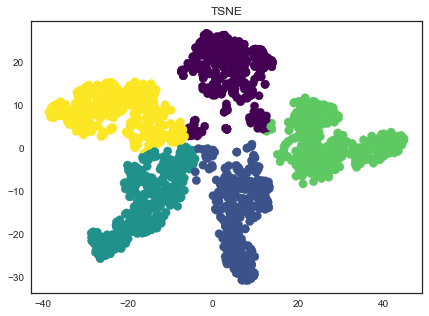

In [93]:
plt.figure(figsize=(7,5))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=prediction, s=70, cmap='viridis')

plt.title('TSNE')
#plt.savefig('K_Means/TSNE_K-Means_POS.png', bbox_inches = "tight")

Text(0.5, 1.0, 'TSNE')

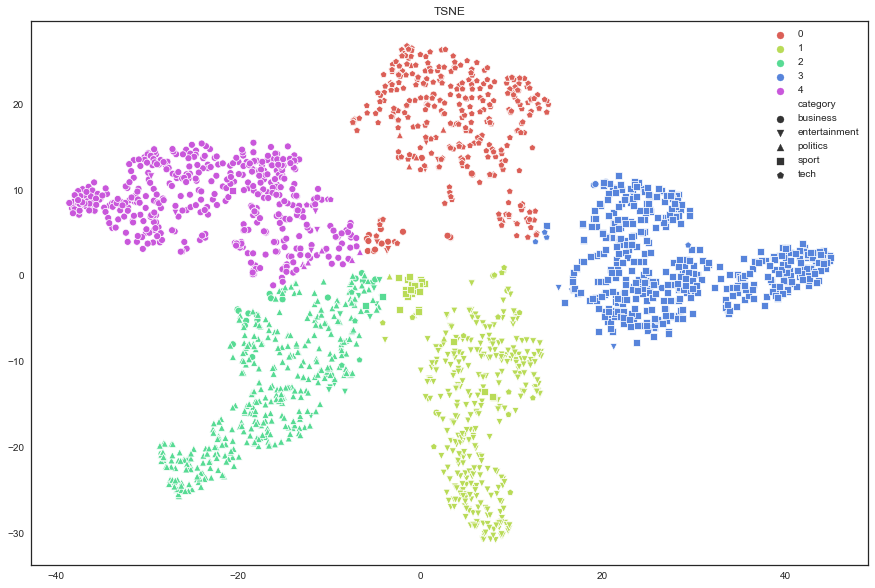

In [94]:
markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
plt.figure(figsize=(15,10))
sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=prediction, style=df.category, markers=markers, palette=sns.color_palette("hls", len(np.unique(prediction))))

plt.title('TSNE')
#plt.savefig('../../Bilder/KMeans/kmeans_tsne_categorymarker_stemming_5_Cluster.png', bbox_inches = "tight")

## TSNE (danach)

In [26]:
import pandas as pd
import numpy as np
from copy import deepcopy
from matplotlib import pyplot as plt
%matplotlib inline
import itertools
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from sklearn import manifold
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture 
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from yellowbrick.text import TSNEVisualizer, UMAPVisualizer

In [6]:
def tfidf(data):
    tf_idf_vectorizor = TfidfVectorizer(max_features=1000,
                                        stop_words='english')
    tf_idf = tf_idf_vectorizor.fit_transform(data)
    tf_idf_norm = normalize(tf_idf)
    tf_idf_array = tf_idf_norm.toarray()
    return tf_idf_array

In [7]:
def visualise_TSNE(Y, hue, style, title, perplexity=50, path=None):
    X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(tf_idf_array)
    X_embedded = TSNE(n_components=2, perplexity=perplexity, n_iter=1000,learning_rate=10, verbose=2).fit_transform(X_reduced)
        
    markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
    plt.figure(figsize=(15,10))
    sns.set_style("white")
    sns.scatterplot(X_embedded[:, 0], X_embedded[:, 1],hue=hue, style=style, markers=markers, palette=sns.color_palette("hls", len(np.unique(hue))))
    plt.title(title)
    if path is not None:
        plt.savefig(path, bbox_inches = "tight")

In [29]:
# def compute_TSNE(text):
#     tsne = TSNE(n_components=2, perplexity = p, n_iter= 1000, learning_rate = 10, verbose=2)
#     Y = tsne.fit_transform(text)
#     return Y

In [30]:
tf_idf_array = tfidf(df.content)

In [31]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(tf_idf_array)
prediction = kmeans.predict(tf_idf_array)

In [32]:
X_reduced = TruncatedSVD(n_components=10, random_state=0).fit_transform(tf_idf_array)

In [33]:
# perplexity = [5, 10, 20, 30, 40, 50, 60 ,80,100]
perplexity = [50]
for p in perplexity:
    X_embedded = TSNE(n_components=2, perplexity=p, n_iter=1000,learning_rate=10, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.011s...
[t-SNE] Computed neighbors for 2225 samples in 0.251s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.081441
[t-SNE] Computed conditional probabilities in 0.250s
[t-SNE] Iteration 50: error = 74.1353912, gradient norm = 0.0000425 (50 iterations in 1.169s)
[t-SNE] Iteration 100: error = 64.3599243, gradient norm = 0.0046859 (50 iterations in 1.118s)
[t-SNE] Iteration 150: error = 62.0791359, gradient norm = 0.0007401 (50 iterations in 1.209s)
[t-SNE] Iteration 200: error = 61.6805305, gradient norm = 0.0002752 (50 iterations in 1.128s)
[t-SNE] Iteration 250: error = 61.5787468, gradient norm = 0.0001214 (50 iterations in 1.096s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.578747
[t-SNE] Iteration 300: err

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2225 samples in 0.009s...
[t-SNE] Computed neighbors for 2225 samples in 0.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2225
[t-SNE] Computed conditional probabilities for sample 2000 / 2225
[t-SNE] Computed conditional probabilities for sample 2225 / 2225
[t-SNE] Mean sigma: 0.081441
[t-SNE] Computed conditional probabilities in 0.264s
[t-SNE] Iteration 50: error = 74.1353912, gradient norm = 0.0000470 (50 iterations in 1.077s)
[t-SNE] Iteration 100: error = 64.1587677, gradient norm = 0.0050083 (50 iterations in 1.034s)
[t-SNE] Iteration 150: error = 61.7096672, gradient norm = 0.0005889 (50 iterations in 0.951s)
[t-SNE] Iteration 200: error = 61.5703430, gradient norm = 0.0001908 (50 iterations in 0.958s)
[t-SNE] Iteration 250: error = 61.5408974, gradient norm = 0.0001067 (50 iterations in 0.939s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.540897
[t-SNE] Iteration 300: err

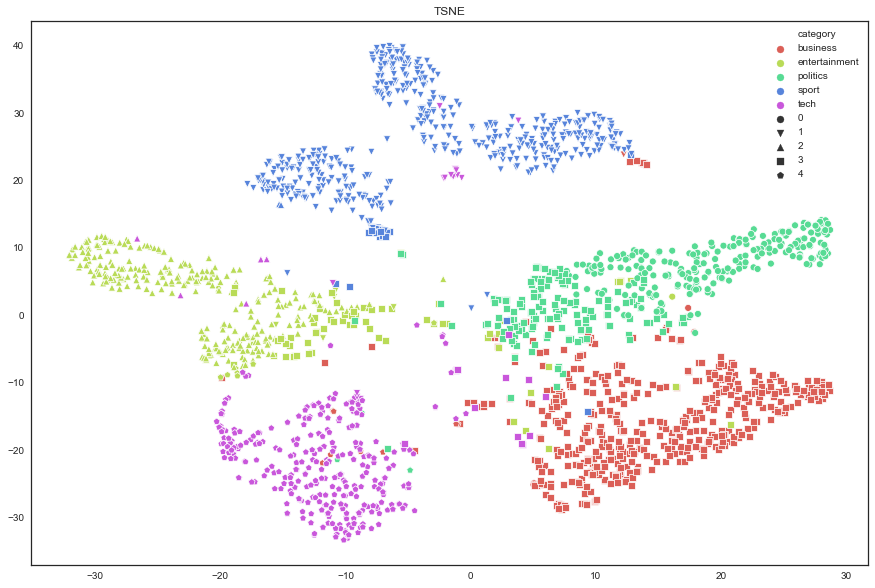

In [34]:
visualise_TSNE(tf_idf_array, df.category, prediction,'TSNE', perplexity=50)

# PCA

## PCA (Davor)

In [35]:
tf_idf_array = tfidf(df.content)

In [8]:
def compute_PCA(text):
    pca = PCA(n_components = 2)
    Y = pca.fit_transform(text)
    return Y

In [37]:
Y_sklearn = compute_PCA(tf_idf_array)
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y)
prediction = kmeans.predict(Y)

In [38]:
def visualise_PCA(Y, hue, style, title, path=None):
    markers = ('o', 'v', '^', '<', '>', 's', 'p','8', '*', 'h', 'H', 'D', 'd', 'P', 'X', 'o', 'v', '^')
    plt.figure(figsize=(15,10))
    sns.scatterplot(Y[:, 0], Y[:, 1],hue=hue, style=style, markers=markers, palette=sns.color_palette("hls", len(np.unique(hue))))
    plt.title(title)
    if path is not None:
        plt.savefig(path, bbox_inches = "tight")

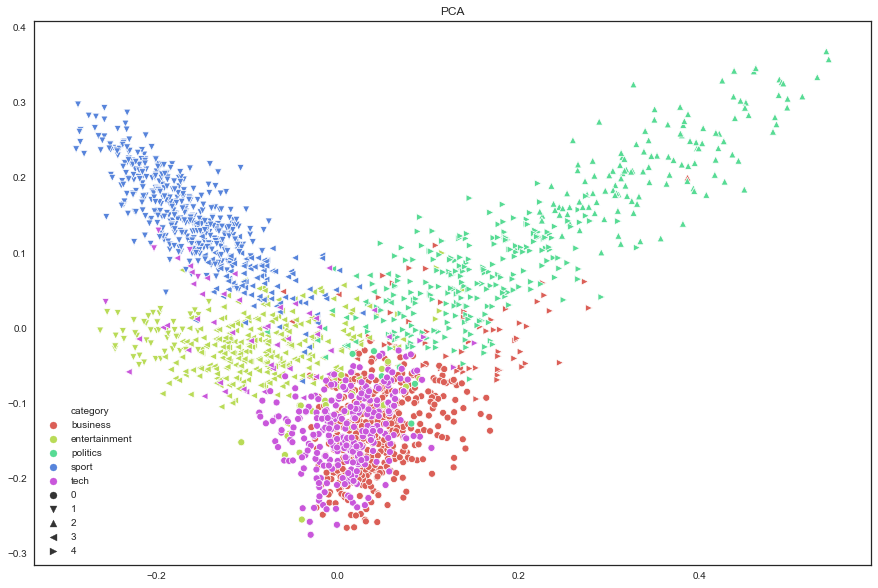

In [39]:
visualise_PCA(Y_sklearn, df.category, prediction, 'PCA')

## PCA (Danach)

In [40]:
kmeans = KMeans(n_clusters=5, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(tf_idf_array)
prediction = kmeans.predict(tf_idf_array)

Y = compute_PCA(tf_idf_array)

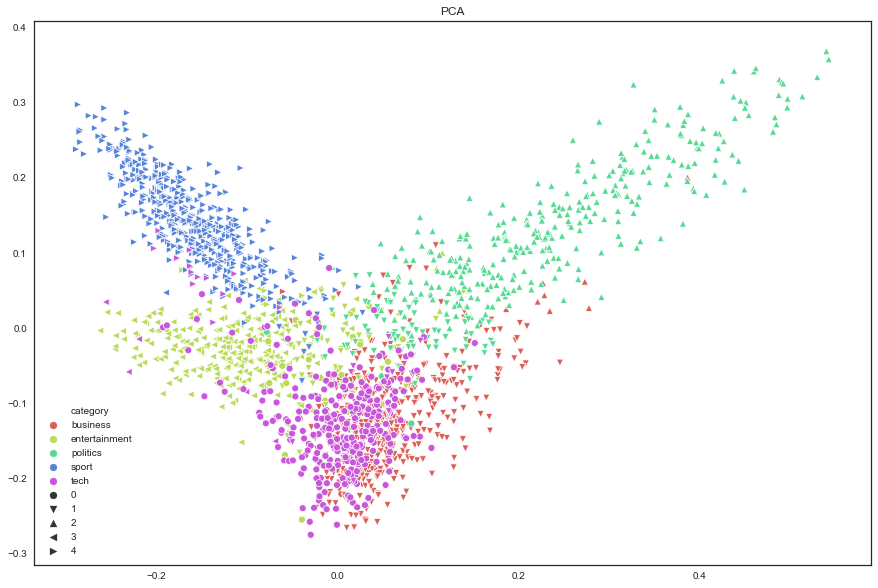

In [41]:
visualise_PCA(Y, df.category, prediction,'PCA')

# UMAP

## UMAP (Davor)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.datasets import load_hobbies
from yellowbrick.text import UMAPVisualizer
import umap
import sklearn.cluster as cluster

In [32]:
docs = tfidf(df.content)
labels = df.category

In [33]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(docs)

In [34]:
kmeans_labels = cluster.KMeans(n_clusters=5, max_iter=600, algorithm='auto').fit_predict(standard_embedding)

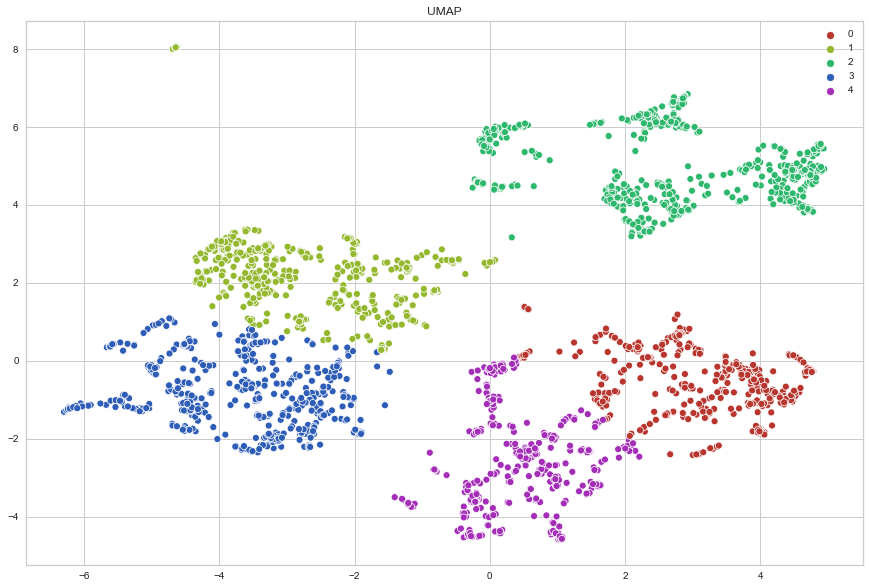

In [35]:
plt.figure(figsize=(15,10))
sns.scatterplot(standard_embedding[:, 0], y=standard_embedding[:, 1],hue=kmeans_labels, 
                palette=sns.hls_palette(n_colors=len(np.unique(kmeans_labels)),l=0.45, s=.6))

plt.title('UMAP')
plt.legend()
#plt.savefig('UMAP_kmeans_stemmed.png')
plt.show()

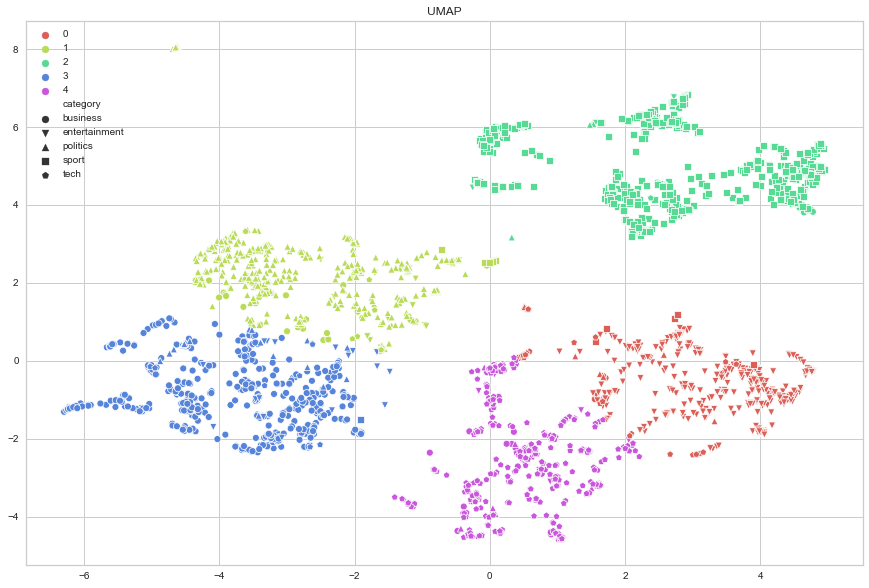

In [36]:
markers = ('o', 'v', '^', 's', 'p', '*','d', 'P', 'X')
plt.figure(figsize=(15,10))
# sns.scatterplot(standard_embedding[:, 0], y=standard_embedding[:, 1],hue=kmeans_labels, 
#                 palette=sns.hls_palette(n_colors=len(np.unique(kmeans_labels)),l=0.45, s=.6))

sns.scatterplot(standard_embedding[:, 0], y=standard_embedding[:, 1],hue=kmeans_labels, 
style=df.category, markers=markers, palette=sns.color_palette("hls", len(np.unique(labels))))

plt.title('UMAP')
plt.legend()
#plt.savefig('UMAP_kmeans_stemmed.png')
plt.show()

## UMAP (Danach)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.datasets import load_hobbies
from yellowbrick.text import UMAPVisualizer
import umap
import sklearn.cluster as cluster

In [77]:
docs = tfidf(df.content)
labels = df.category

In [78]:
kmeans_labels = cluster.KMeans(n_clusters=5, max_iter=600, algorithm='auto').fit_predict(docs)

In [79]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(docs)

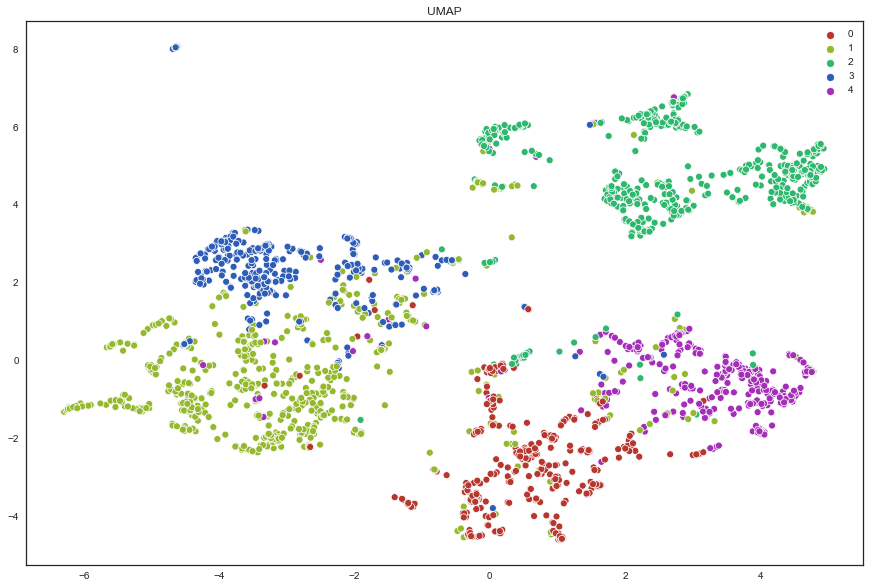

In [80]:
plt.figure(figsize=(15,10))
sns.scatterplot(standard_embedding[:, 0], y=standard_embedding[:, 1],hue=kmeans_labels, 
                palette=sns.hls_palette(n_colors=len(np.unique(kmeans_labels)),l=0.45, s=.6))
plt.title('UMAP')
plt.legend()
#plt.savefig('UMAP_kmeans_stemmed.png')
plt.show()